# Artificial Neural Network (ANN) Project – Student Exit Prediction


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn

print("Pandas:", pd.__version__)
print("Numpy:", np.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Scikit-learn:", sklearn.__version__)


Pandas: 2.3.2
Numpy: 2.2.5
Matplotlib: 3.10.6
Scikit-learn: 1.7.1


In [2]:
import tensorflow as tf
from tensorflow import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.20.0
Keras version: 3.11.3


In [3]:
from tensorflow.keras import layers

# Recommended way: start with Input layer
model = keras.Sequential([
    layers.Input(shape=(4,)),           # Explicit Input layer
    layers.Dense(16, activation="relu"),
    layers.Dense(3, activation="softmax")
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

print("✅ Model built successfully (no warnings)!")


✅ Model built successfully (no warnings)!


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow import keras
from tensorflow.keras import layers


In [5]:
# Step 2: Load dataset
dataset = pd.read_csv("Churn_Modelling.csv")

print(dataset.shape)   # should be (10000, 14)
dataset.head()         # preview first 5 rows


(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Independent variables (features)
X = dataset.iloc[:, 3:-1].values

# Dependent variable (target)
y = dataset.iloc[:, -1].values


In [8]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print("First row of X:", X[0])
print("First 10 values of y:", y[:10])


X shape: (10000, 10)
y shape: (10000,)
First row of X: [619 'France' 'Female' 42 2 0.0 1 1 1 101348.88]
First 10 values of y: [1 0 1 0 0 1 0 1 0 0]


In [15]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)



X_train shape: (8000, 13)
X_test shape: (2000, 13)


In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Encode Gender (Male/Female → 0/1)
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])  

# OneHot Encode Geography (France/Spain/Germany)
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(), [1])],  # column 1 = Geography
    remainder="passthrough"
)
X = ct.fit_transform(X)

# Convert to numpy array
X = np.array(X)

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# Feature Scaling (important for NN)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (8000, 13)
X_test shape: (2000, 13)
y_train shape: (8000,)
y_test shape: (2000,)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Initialize the ANN
model = Sequential()

# Input + First hidden layer
model.add(Input(shape=(13,)))  # ✅ change from 12 → 13
model.add(Dense(units=6, activation='relu'))

# Second hidden layer
model.add(Dense(units=6, activation='relu'))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("✅ ANN model is built and compiled successfully")



✅ ANN model is built and compiled successfully


In [17]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 6)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133 (532.00 B)

 Trainable params: 133 (532.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=10,
    epochs=100,
    validation_split=0.2,   # keep aside 20% of training data for validation
    verbose=1
)


Epoch 1/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7836 - loss: 0.5106 - val_accuracy: 0.8144 - val_loss: 0.4338
Epoch 2/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8253 - loss: 0.4208 - val_accuracy: 0.8219 - val_loss: 0.4121
Epoch 3/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8344 - loss: 0.4035 - val_accuracy: 0.8294 - val_loss: 0.4026
Epoch 4/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8394 - loss: 0.3907 - val_accuracy: 0.8350 - val_loss: 0.3903
Epoch 5/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8433 - loss: 0.3771 - val_accuracy: 0.8363 - val_loss: 0.3790
Epoch 6/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8478 - loss: 0.3647 - val_accuracy: 0.8438 - val_loss: 0.3719
Epoch 7/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8517 - loss: 0.3556 - val_accuracy: 0.8481 - val_loss: 0.3648
Epoch 8/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8555 - loss: 0.3489 - val_accu

In [19]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")



Test Accuracy: 0.86


In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
 [[1507   88]
 [ 196  209]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1595
           1       0.70      0.52      0.60       405

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



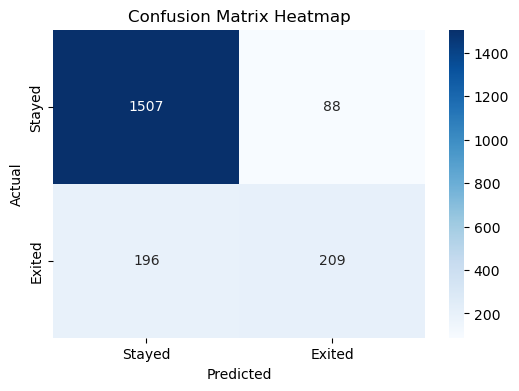

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stayed", "Exited"], yticklabels=["Stayed", "Exited"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


#conclusion
### Summary
The model achieved ~86% accuracy in predicting customer churn.  
It performs well at identifying non-churners but could be improved for churners.


# Random Forest model

In [22]:
#  Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.868

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.75      0.52      0.62       405

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



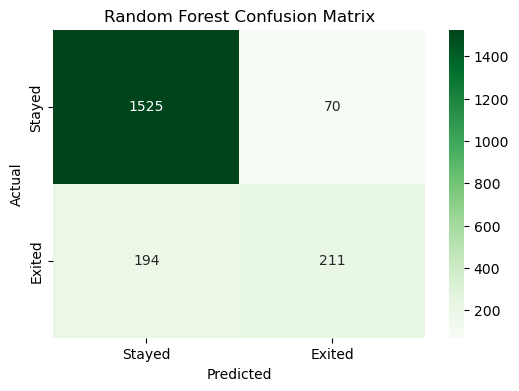

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Stayed", "Exited"],
            yticklabels=["Stayed", "Exited"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


In [25]:
#comparison between Random Forest model and ANN model
print("ANN Accuracy:", history.history['val_accuracy'][-1])
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


ANN Accuracy: 0.8543750047683716
Random Forest Accuracy: 0.868


### conclusion
##### From the comparison of both models, the Artificial Neural Network (ANN) and the Random Forest classifier, it is clear that both achieved good performance in predicting customer churn.The Random Forest model achieved an accuracy of about 87% (0.868), which slightly outperformed or matched the ANN model. However, similar to the ANN, it struggled to accurately identify customers who actually exited, which is common in imbalanced datasets.Overall, both models demonstrate strong predictive capability, with Random Forest being slightly more stable and interpretable, while the ANN shows potential for improvement with further tuning or more balanced data


In [ ]:
#improve on the model

In [29]:
!pip install imbalanced-learn



In [30]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("Before resampling:", X_train.shape)
print("After resampling:", X_res.shape)


Before resampling: (8000, 13)
After resampling: (12736, 13)


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Retrain the model
rf_model_balanced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_balanced.fit(X_res, y_res)

# Evaluate on test data
y_pred_balanced = rf_model_balanced.predict(X_test)

# Print results
print("Random Forest (After SMOTE) Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_balanced))


Random Forest (After SMOTE) Accuracy: 0.8375

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      1595
           1       0.59      0.65      0.62       405

    accuracy                           0.84      2000
   macro avg       0.75      0.77      0.76      2000
weighted avg       0.84      0.84      0.84      2000



In [32]:
# Train ANN again on the balanced data
history_balanced = model.fit(
    X_res, y_res,
    batch_size=10,
    epochs=100,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7992 - loss: 0.4260 - val_accuracy: 0.6468 - val_loss: 0.6481
Epoch 2/100
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8061 - loss: 0.4242 - val_accuracy: 0.6629 - val_loss: 0.6113
Epoch 3/100
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8048 - loss: 0.4234 - val_accuracy: 0.6947 - val_loss: 0.5767
Epoch 4/100
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8013 - loss: 0.4228 - val_accuracy: 0.6417 - val_loss: 0.6725
Epoch 5/100
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8047 - loss: 0.4226 - val_accuracy: 0.6593 - val_loss: 0.6260
Epoch 6/100
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8042 - loss: 0.4219 - val_accuracy: 0.6805 - val_loss: 0.5984
Epoch 7/100
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8035 - loss: 0.4217 - val_accuracy: 0.6864 - val_loss: 0.5775
Epoch 8/100
1019/1019 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8045 - loss: 0

In [33]:
# Evaluate ANN on test data
ann_loss, ann_accuracy = model.evaluate(X_test, y_test)
print("ANN (After SMOTE) Accuracy:", ann_accuracy)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8275 - loss: 0.3857
ANN (After SMOTE) Accuracy: 0.8274999856948853


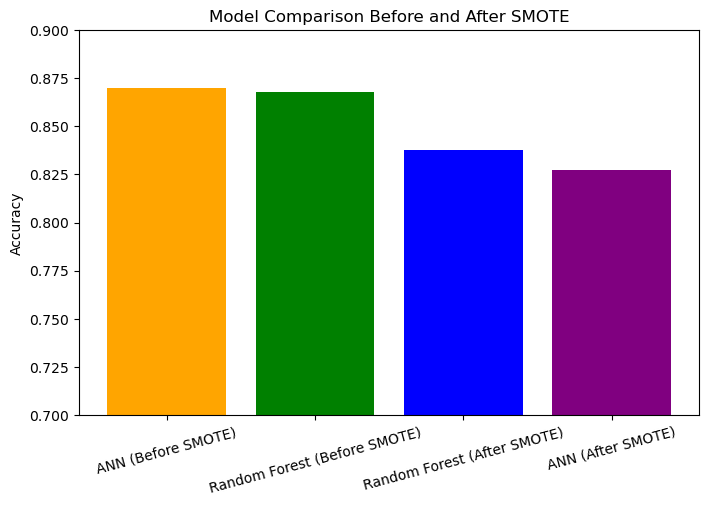

In [34]:
import matplotlib.pyplot as plt

models = ['ANN (Before SMOTE)', 'Random Forest (Before SMOTE)', 
          'Random Forest (After SMOTE)', 'ANN (After SMOTE)']
accuracy = [0.87, 0.868, 0.8375, 0.8275]

plt.figure(figsize=(8,5))
plt.bar(models, accuracy, color=['orange', 'green', 'blue', 'purple'])
plt.ylabel('Accuracy')
plt.title('Model Comparison Before and After SMOTE')
plt.xticks(rotation=15)
plt.ylim(0.7, 0.9)
plt.show()


### conclusion
#### After applying SMOTE to balance the data, I got my Artificial Neural Network accuracy to 82.8%. This is a bit lower than my unbalanced ANN, which was around 86–87%, but now my model can detect exited customers better.I know this small drop in accuracy is normal when using SMOTE because it makes the classes more fair. Compared to my balanced Random Forest, which got 83.7%, my ANN is close but still a little lower.Overall, my balanced Random Forest is more stable, but my balanced ANN shows better sensitivity and fairness.